# Modelos de regresión lineal
## Modelo con datos simulados

#### y = a  + (b * x)
* X: 100 valores distribuidos segun una N(1.5, 2.5)
* Ye = 2 + (12 * x) + e
* e estará distribuída según una N(0,0.8)

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Vector de x
x = 1.5 +2.5 * np.random.randn(100)

In [3]:
#Residuos[media, desvest]
res = 0 + 0.8 * np.random.randn(100)

In [4]:
#Predictor [media, desvest]
y_pred = 5 + 1.9 * x

In [5]:
#real [media, desvest]
y_act = 5 + 1.9 * x + res

In [6]:
#Construir listas
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [7]:
# Construir dataFrame
data = pd.DataFrame({
    'x':x_list,
    'y_act':y_act_list,
    'y_pred':y_pred_list
})

In [8]:
data.head()

,x,y_act,y_pred
0,3.243923,10.830038,11.163454
1,3.096620,11.969732,10.883578
2,-1.271217,2.172003,2.584688
3,2.236327,9.470132,9.249022
4,2.129424,9.547598,9.045906


In [9]:
import matplotlib.pyplot as plt

In [10]:
# Calcular la media de Y para cada registro de x
y_mean = [np.mean(y_act) for i in range(1,len(x_list)+1)] 

Text(0.5, 1.0, 'Valor actual [rojo] vs predicción [azul]')

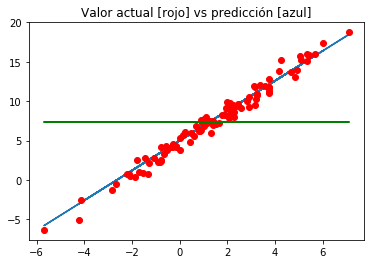

In [11]:
%matplotlib inline
plt.plot(x, y_pred)
plt.plot(x, y_act, 'ro')
plt.plot(x, y_mean, 'g')
plt.title('Valor actual [rojo] vs predicción [azul]')

In [12]:
data['SSR'] = (data['y_pred']-np.mean(y_act))**2
data['SSD'] = (data['y_pred']-data['y_act'])**2
data['SST'] = (data['y_act']-np.mean(y_act))**2
                                   
                                   


In [13]:
data.head()

,x,y_act,y_pred,SSR,SSD,SST
0,3.243923,10.830038,11.163454,14.166774,0.111167,11.768060
1,3.096620,11.969732,10.883578,12.138260,1.179732,20.886319
2,-1.271217,2.172003,2.584688,23.183156,0.170309,27.327534
3,2.236327,9.470132,9.249022,3.420445,0.048890,4.287196
4,2.129424,9.547598,9.045906,2.710400,0.251695,4.613994


In [14]:
SSR = sum(data['SSR'])
SSD = sum(data['SSD'])
SST = sum(data['SST'])

In [15]:
print (SSR)
print (SSD)
print (SSR+SSD)

2107.6891336748567
58.283928744023655
2165.9730624188805


In [16]:
R2 = SSR / SST
print (R2)

0.8911840999539461


(array([ 1.,  0.,  9., 14., 15., 23., 18., 15.,  4.,  1.]),
 array([-2.09929453, -1.68058513, -1.26187573, -0.84316633, -0.42445693,
        -0.00574753,  0.41296187,  0.83167127,  1.25038067,  1.66909007,
         2.08779947]),
 <a list of 10 Patch objects>)

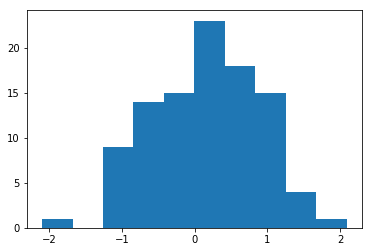

In [17]:
plt.hist(data['y_pred']-data['y_act'])

# Obteniendo la recta de regresión lineal
 * y = a + b * x
 * b = sum((xi- x_m)*(y_i_m))/sum((xi-x_m)^2
 * a = y_m -b * x_m

### Promedios

In [19]:
x_mean = np.mean(data['x'])
y_mean = np.mean(data['y_act'])
x_mean, y_mean

(1.3479583822883614, 7.399577013662503)

### Calcular la beta

In [21]:
# Numerador [arriba] (data cov --> covarianza)
data['beta_n'] = (data['x']-x_mean) * (data['y_act']-y_mean)
# Denominador [abajo]
data['beta_d'] = (data['x']-x_mean)**2

In [22]:
#Beta
beta = sum (data['beta_n'])/sum(data['beta_d'])

In [23]:
alpha = y_mean - beta * x_mean


In [24]:
alpha, beta

(4.714182726734279, 1.992193766672057)

### Modelo de regresión lineal obtenido


y = alpha + (beta + (x))

y = 4.714182726734279 + (1.992193766672057 * (x))

In [25]:
data['y_model'] = alpha + beta * data['x']

In [26]:
data.head()

,x,y_act,y_pred,SSR,SSD,SST,beta_n,beta_d,y_model
0,3.243923,10.830038,11.163454,14.166774,0.111167,11.768060,6.504033,3.594683,11.176707
1,3.096620,11.969732,10.883578,12.138260,1.179732,20.886319,7.991654,3.057817,10.883249
2,-1.271217,2.172003,2.584688,23.183156,0.170309,27.327534,13.691933,6.860079,2.181672
3,2.236327,9.470132,9.249022,3.420445,0.048890,4.287196,1.839416,0.789199,9.169380
4,2.129424,9.547598,9.045906,2.710400,0.251695,4.613994,1.678605,0.610689,8.956409


### Cálculo del R cuadrado

In [28]:
SSR = sum((data['y_model']-y_mean)**2)   #Residuos cuadrados
SSD = sum((data['y_model']-data['y_act'])**2)               #Residuos de la diferencia                    
SST = sum((data['y_act']-y_mean)**2)            # Residuos totales

In [30]:
r2 = SSR / SST
#[modelo actual(r2) vs modelo anterior(R2)]
r2, R2

(0.9785551902408837, 0.8911840999539461)

Text(0.5, 1.0, 'Valor actual [rojo] vs predicción [azul]')

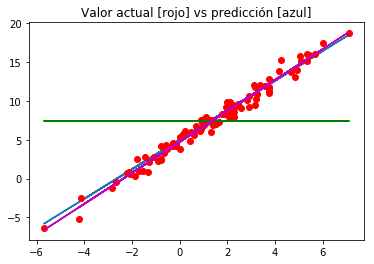

In [33]:
y_mean = [np.mean(y_act) for i in range(1,len(x_list)+1)] 
%matplotlib inline
plt.plot(x, y_pred)
plt.plot(x, y_act, 'ro')
plt.plot(x, y_mean, 'g')
plt.plot(data['x'], data['y_model'], 'm')
plt.title('Valor actual [rojo] vs predicción [azul]')

## Error estándar de los residuos

In [35]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.7193953472009887

In [37]:
np.mean(data['y_act'])

7.399577013662503

In [38]:
# Error debido al uso del nuevo modelo
RSE / np.mean(data['y_act'])

0.09722114465093135